Завдання 2, ЛБ 3 Тимошенко Володимир Назарійович

Epoch 1/50
469/469 [==============================] - 12s 17ms/step - loss: 54.9864 - val_loss: 45.5413
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 44.4048 - val_loss: 43.6681
Epoch 3/50
469/469 [==============================] - 7s 16ms/step - loss: 43.2534 - val_loss: 42.8901
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 42.6184 - val_loss: 42.4057
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 42.1419 - val_loss: 41.9476
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 41.7172 - val_loss: 41.5806
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 41.3556 - val_loss: 41.2793
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 41.0103 - val_loss: 40.9290
Epoch 9/50
469/469 [==============================] - 7s 16ms/step - loss: 40.6946 - val_loss: 40.6364
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - lo

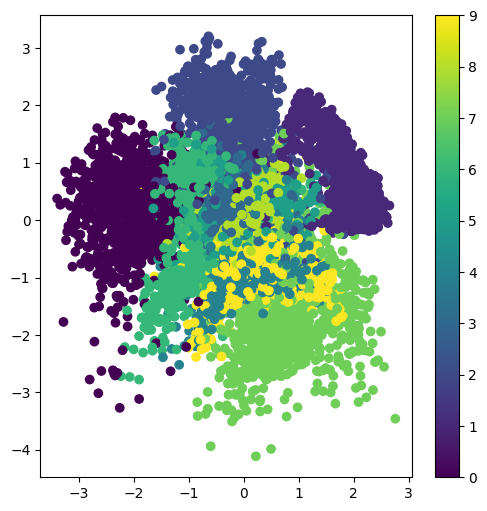

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras import backend as K
from keras.losses import mse

# Завантаження даних MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормалізація даних
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Параметри моделі
original_dim = 784
intermediate_dim = 256
latent_dim = 2
batch_size = 128
epochs = 50

# Варіаційне кодування
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Декодування
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Варіаційний автокодувальник
vae = Model(inputs, x_decoded_mean)

# Функція втрат
xent_loss = original_dim * mse(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Навчання моделі
vae.fit(x_train, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Візуалізація розпізнавання
encoder = Model(inputs, z_mean)
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()
